## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Data Cleaning Process

In [102]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import datetime
datetime.datetime.strptime
import seaborn as sns
# SciKitLearn 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import rfpimp



from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-notebook')# Your code here - remember to use markdown cells for comments as well!

In [103]:
df = pd.read_csv('./data/kc_house_data.csv', parse_dates=['date']) # specify index_col=0 to avoid creating an "Unnamed: 0" column.

# specify parse date to avoid object dtype for dates

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

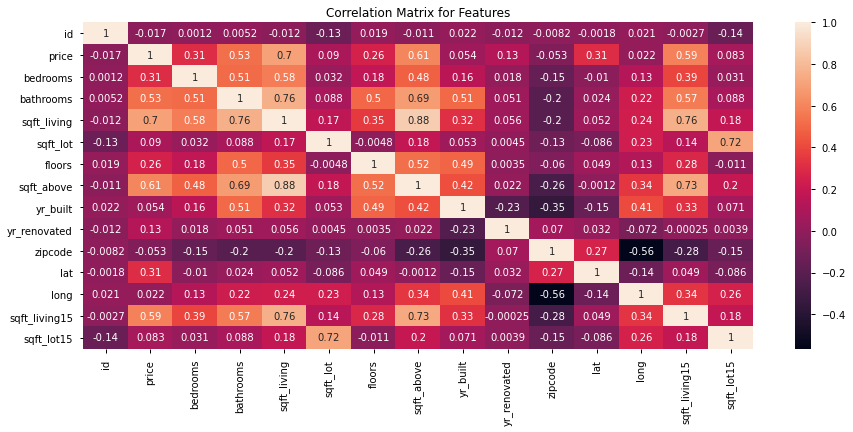

In [105]:
#Created a heatmap to see correlations of all columns in data
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

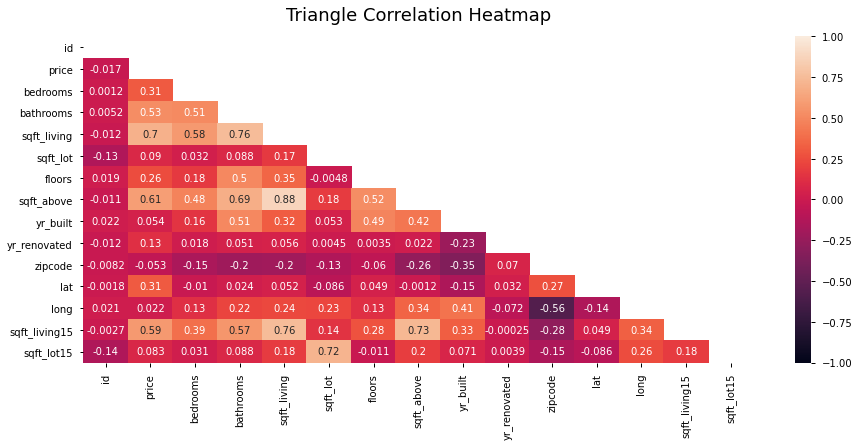

In [106]:
#Masked Data to show only one side of the heat map
plt.figure(figsize=(15,6))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [107]:
#dropped columns we felt were not needed for our recommendations
df.drop(columns= ['waterfront', 'view', 'sqft_above','sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15','yr_renovated','id','date'], inplace=True)

In [108]:
#ordinal encoding process
df['condition'] = df['condition'].astype('category')
df['condition'] = df['condition'].cat.reorder_categories(['Poor', 'Fair', 'Average', 'Good', 'Very Good'])
df['condition'].cat.codes
ord_cat_selector = ['condition']
cat_subset = df[ord_cat_selector]
cat_subset['condition'].unique()
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 
o_enc = OrdinalEncoder(categories = [condition_list])
o_enc.fit(cat_subset)
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset

,condition
0,2.0
1,2.0
2,2.0
3,4.0
4,2.0
...,...
21592,2.0
21593,2.0
21594,2.0
21595,2.0


In [109]:
#made a new row in the dataframe containing the ordinal encoded condition codes
df['condition_code'] = X_subset

In [110]:
#changed the grade column to only include the nominal value of the category
df['grade'] = df['grade'].str.split().apply(lambda x: x[0])
df['grade'] = df['grade'].astype(int)

In [111]:
sqft_filter = df[(df['sqft_living'] < 6000)]

C:\Users\Kev\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


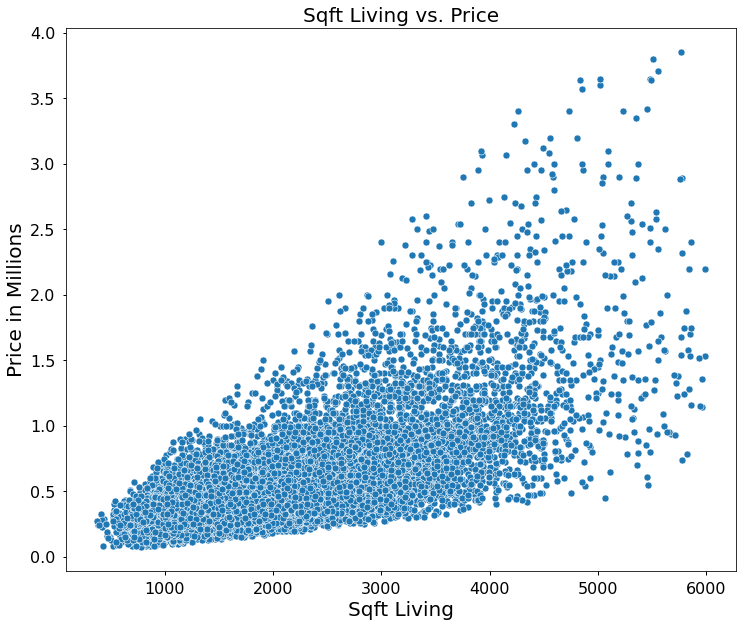

<Figure size 576x396 with 0 Axes>

In [112]:
#plot 'price' vs. sqft_living'

plt.figure(figsize = (12, 10))
sns.scatterplot(sqft_filter['sqft_living'], sqft_filter['price']/1e6)
plt.title('Sqft Living vs. Price',fontsize = 20)
plt.xlabel('Sqft Living',fontsize = 20)
plt.ylabel('Price in Millions',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()
plt.savefig('./Data/sqft_price_barplot')

C:\Users\Kev\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


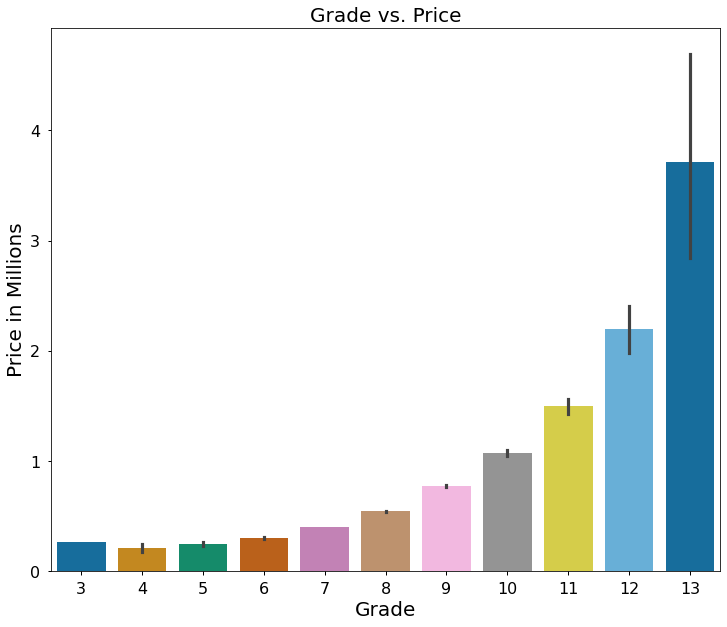

<Figure size 576x396 with 0 Axes>

In [113]:
#barplot 'grade' vs. 'price'  distribution
plt.figure(figsize = (12, 10))
sns.barplot(df['grade'], df['price']/1e6, 
            palette = "colorblind")

plt.title('Grade vs. Price',fontsize = 20)
plt.xlabel('Grade',fontsize = 20)
plt.ylabel('Price in Millions',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);
plt.show()
plt.savefig('./Data/grade_vs_price_barplot')

# Scaling Model 1

In [114]:
#scale features for first model
columns = ['sqft_living', 'bathrooms', 'bedrooms']
X = df[columns]
ss = StandardScaler().fit(X)
X_scaled = ss.transform(X)

In [115]:
X_c = sm.add_constant(X_scaled)
y = df['price']

In [116]:
model = sm.OLS(endog=y,exog=X_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:47:09   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.403e+05   1755.416    307.788      0.000    5.37e+05    5.44e+05
x1          2.848e+05   2847.439    100.011      0.000    2.79e+05     2.9e+05
x2          5889.5876   2709.301      2.174      0.030     579.157    1.12e+04
x3         -5.426e+04   2174.555    -24.950      0.000   -5.85e+04      -5e+04
==============================================================================
Omnibus:                    14417.262   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           490912.091
Skew:                           2.734   Prob(JB):                         0.00
Kurtosis:                      25.707   Cond. No.                         3.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

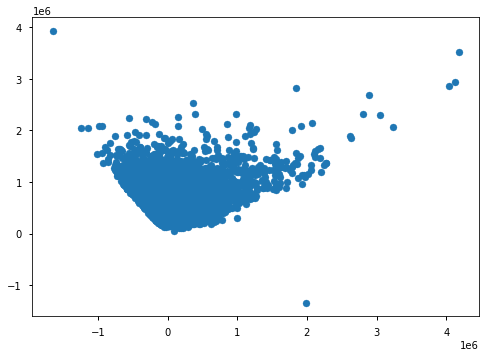

In [117]:
#Get a visual of predictions vs residuals
model_preds = model.predict(X_c)
resids = y - model_preds

fig, ax = plt.subplots()
ax.scatter(resids,model_preds)


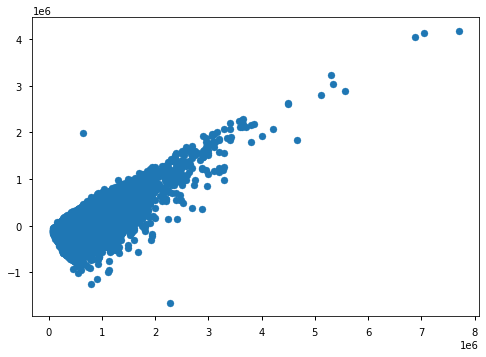

In [118]:
#Get a visual of price vs residuals
fig, ax = plt.subplots()
ax.scatter(y,resids)

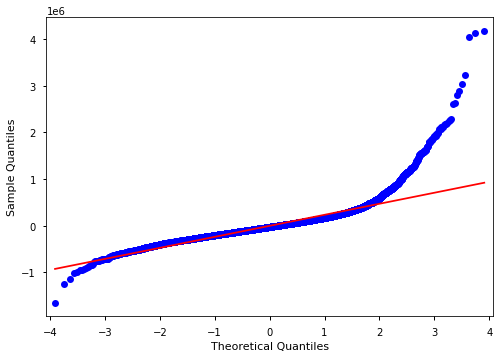

In [119]:
#residuals and best fit line
sm.qqplot(resids,line='r');

# Model 2 with logged Price 

In [120]:
#log the price
y_log = np.log(y)
model2 = sm.OLS(endog=y_log,exog=X_c).fit()
model2_preds = model2.predict(X_c)
model2_resids = y_log - model2_preds
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     6943.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:47:09   Log-Likelihood:                -9500.0
No. Observations:               21597   AIC:                         1.901e+04
Df Residuals:                   21593   BIC:                         1.904e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0482      0.003   5103.981      0.000      13.043      13.053
x1             0.3646      0.004     87.929      0.000       0.356       0.373
x2             0.0410      0.004     10.389      0.000       0.033       0.049
x3            -0.0511      0.003    -16.145      0.000      -0.057      -0.045
==============================================================================
Omnibus:                       13.826   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.144
Skew:                           0.048   Prob(JB):                     0.000849
Kurtosis:                       3.080   Cond. No.                         3.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

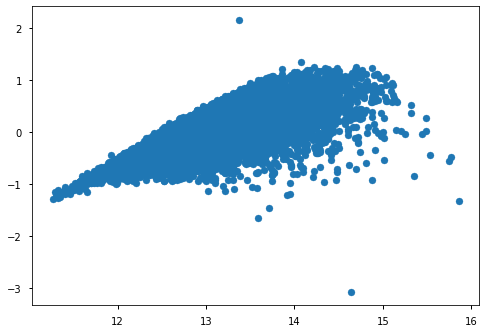

In [121]:
#visual of new y log vs model 2 residuals
fig, ax = plt.subplots()
ax.scatter(y_log,model2_resids)

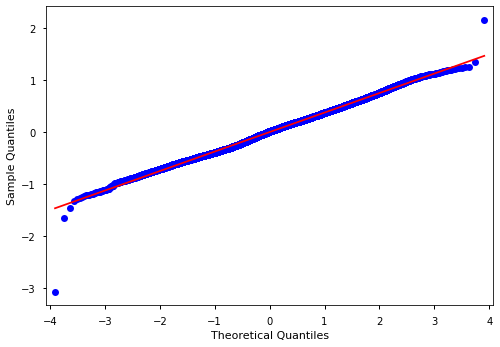

In [122]:
#visual of logged price residual line
sm.qqplot(model2_resids,line='r');

In [123]:

columns = ['sqft_living','grade']
X = df[columns]
ss = StandardScaler().fit(X)
X_scaled = ss.transform(X)
X_c = sm.add_constant(X_scaled)

In [124]:
y_log = np.log(y)
model4 = sm.OLS(endog=y_log,exog=X_c).fit()
model4_preds = model4.predict(X_c)
model4_resids = y_log - model4_preds
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                 1.348e+04
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:47:10   Log-Likelihood:                -8043.2
No. Observations:               21597   AIC:                         1.609e+04
Df Residuals:                   21594   BIC:                         1.612e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0482      0.002   5460.265      0.000      13.044      13.053
x1             0.1995      0.004     53.974      0.000       0.192       0.207
x2             0.2184      0.004     59.100      0.000       0.211       0.226
==============================================================================
Omnibus:                       55.875   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.557
Skew:                           0.116   Prob(JB):                     8.63e-13
Kurtosis:                       2.909   Cond. No.                         2.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 3 Y log and more features

In [140]:

columns = ['sqft_living','sqft_lot','grade','condition_code','yr_built','bedrooms']
X = df[columns]
ss = StandardScaler().fit(X)
X_scaled = ss.transform(X)
X_c = sm.add_constant(X_scaled)


In [126]:
y_log = np.log(y)
model3 = sm.OLS(endog=y_log,exog=X_c).fit()
model3_preds = model3.predict(X_c)
model3_resids = y_log - model3_preds
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     5916.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:47:10   Log-Likelihood:                -6292.2
No. Observations:               21597   AIC:                         1.260e+04
Df Residuals:                   21590   BIC:                         1.265e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0482      0.002   5920.862      0.000      13.044      13.053
x1             0.2037      0.004     50.788      0.000       0.196       0.212
x2            -0.0076      0.002     -3.379      0.001      -0.012      -0.003
x3             0.2888      0.004     78.746      0.000       0.282       0.296
x4             0.0251      0.002     10.555      0.000       0.020       0.030
x5            -0.1393      0.003    -53.230      0.000      -0.144      -0.134
x6            -0.0187      0.003     -6.790      0.000      -0.024      -0.013
==============================================================================
Omnibus:                       78.159   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.559
Skew:                          -0.111   Prob(JB):                     2.64e-19
Kurtosis:                       3.214   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
df['price_per_squarefoot'] = df['price'] / df['sqft_living']

In [138]:
import rfpimp
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

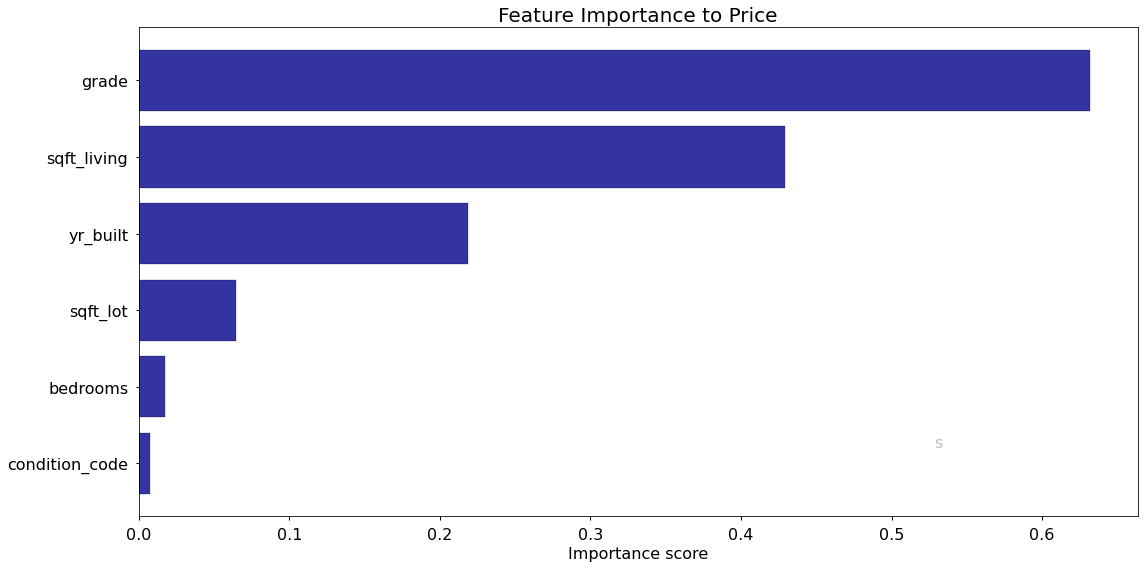

In [139]:
#credit to aegis4048.github.io for the visualization process

features = ['sqft_living','sqft_lot','grade','condition_code','yr_built','bedrooms','price']

# Train/test split

df_train, df_test = train_test_split(df, test_size=0.25)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('price',axis=1), df_train['price']
X_test, y_test = df_test.drop('price',axis=1), df_test['price']

# Train 

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

# Permutation feature importance 

imp = rfpimp.importances(rf, X_test, y_test)

# Plot 

fig, ax = plt.subplots(figsize=(16, 8))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='darkblue', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score',fontsize=16)
ax.set_title('Feature Importance to Price',fontsize=20)
ax.text(0.8, 0.15, 's', fontsize=16, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.gca().invert_yaxis()

fig.tight_layout()